<a href="https://colab.research.google.com/github/RolandoJavierEscobar/MachineLearning/blob/main/EjercicioDeRegresionLineal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

datos = pd.read_csv("U4_01_housing.csv")

In [2]:
datos.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [3]:
datos["ocean_proximity"].value_counts()

,count
ocean_proximity,
<1H OCEAN,9136
INLAND,6551
NEAR OCEAN,2658
NEAR BAY,2290
ISLAND,5


In [4]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [5]:
datos.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

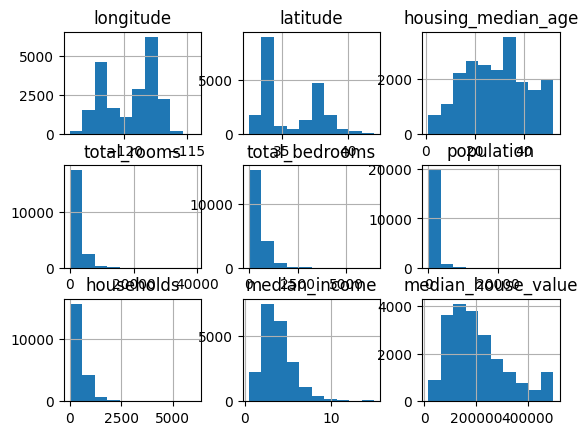

In [6]:
datos.hist()

array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

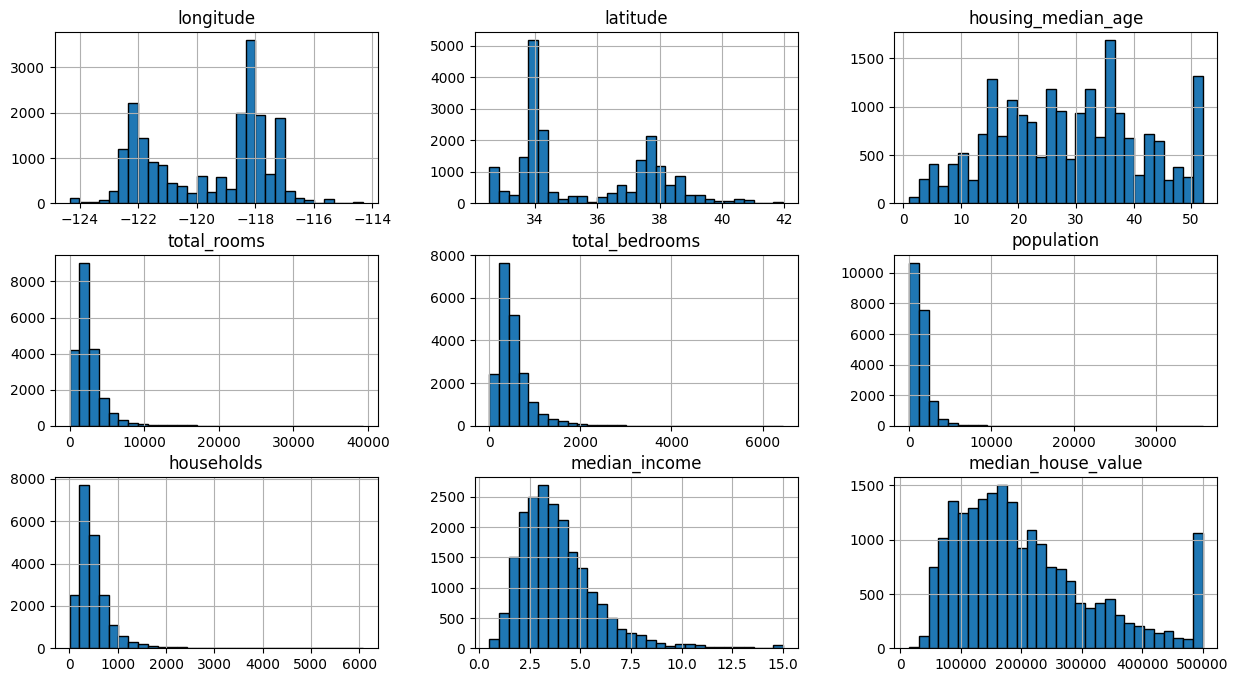

In [7]:
datos.hist(figsize=(15,8), bins=30, edgecolor = "black")
# print(datos.dtypes)
# datos = datos.dropna(subset=["population"], inplace=True)


<Axes: xlabel='latitude', ylabel='longitude'>

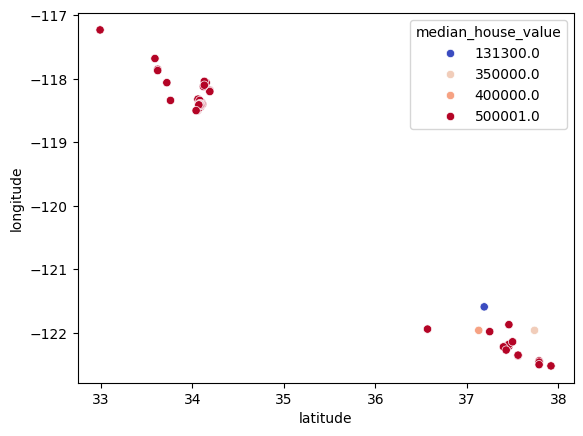

In [8]:
import seaborn as sb

sb.scatterplot(data=datos[(datos.median_income > 14)], x="latitude",y="longitude", hue="median_house_value", palette="coolwarm")

In [9]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [19]:
datos_na = datos.dropna()
#datos = datos.dropna(subset=["population"], inplace=True)
#datos_na.info()

In [21]:
# proximidad al oceano

datos_na["ocean_proximity"]

,ocean_proximity
0,NEAR BAY
1,NEAR BAY
2,NEAR BAY
3,NEAR BAY
4,NEAR BAY
...,...
20635,INLAND
20636,INLAND
20637,INLAND
20638,INLAND


In [22]:
datos_na["ocean_proximity"].value_counts()

,count
ocean_proximity,
<1H OCEAN,9034
INLAND,6496
NEAR OCEAN,2628
NEAR BAY,2270
ISLAND,5


In [23]:
dummies = pd.get_dummies(datos_na["ocean_proximity"], dtype=int)

In [24]:
print(dummies)


       <1H OCEAN  INLAND  ISLAND  NEAR BAY  NEAR OCEAN
0              0       0       0         1           0
1              0       0       0         1           0
2              0       0       0         1           0
3              0       0       0         1           0
4              0       0       0         1           0
...          ...     ...     ...       ...         ...
20635          0       1       0         0           0
20636          0       1       0         0           0
20637          0       1       0         0           0
20638          0       1       0         0           0
20639          0       1       0         0           0

[20433 rows x 5 columns]


In [25]:
datos_na = datos_na.join(dummies)


In [26]:
datos_na.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,0,0,0,1,0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,0,0,0,1,0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,0,0,0,1,0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,0,0,0,1,0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,0,0,0,1,0


In [31]:
datos_na = datos_na.drop("ocean_proximity", axis=1)
datos_na.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,0,0,0,1,0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,0,0,0,1,0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,0,0,0,1,0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,0,0,0,1,0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,0,0,0,1,0


In [32]:
# analisis, nuevas caracteristicas
datos_na.corr()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
longitude,1.000000,-0.924616,-0.109357,0.045480,0.069608,0.100270,0.056513,-0.015550,-0.045398,0.320831,-0.055337,0.009501,-0.474714,0.046185
latitude,-0.924616,1.000000,0.011899,-0.036667,-0.066983,-0.108997,-0.071774,-0.079626,-0.144638,-0.446928,0.351084,-0.016662,0.358785,-0.161342
housing_median_age,-0.109357,0.011899,1.000000,-0.360628,-0.320451,-0.295787,-0.302768,-0.118278,0.106432,0.045553,-0.236968,0.017105,0.256149,0.020797
total_rooms,0.045480,-0.036667,-0.360628,1.000000,0.930380,0.857281,0.918992,0.197882,0.133294,-0.003777,0.026477,-0.007603,-0.023647,-0.008674
total_bedrooms,0.069608,-0.066983,-0.320451,0.930380,1.000000,0.877747,0.979728,-0.007723,0.049686,0.018314,-0.006463,-0.004361,-0.019873,0.000679
population,0.100270,-0.108997,-0.295787,0.857281,0.877747,1.000000,0.907186,0.005087,-0.025300,0.073450,-0.019602,-0.010451,-0.061480,-0.023498
households,0.056513,-0.071774,-0.302768,0.918992,0.979728,0.907186,1.000000,0.013434,0.064894,0.041883,-0.038265,-0.009119,-0.011280,0.002106
median_income,-0.015550,-0.079626,-0.118278,0.197882,-0.007723,0.005087,0.013434,1.000000,0.688355,0.168715,-0.237536,-0.009281,0.056677,0.027351
median_house_value,-0.045398,-0.144638,0.106432,0.133294,0.049686,-0.025300,0.064894,0.688355,1.000000,0.257614,-0.484787,0.023525,0.160526,0.140378
<1H OCEAN,0.320831,-0.446928,0.045553,-0.003777,0.018314,0.073450,0.041883,0.168715,0.257614,1.000000,-0.607778,-0.013928,-0.314721,-0.342018


<Axes: >

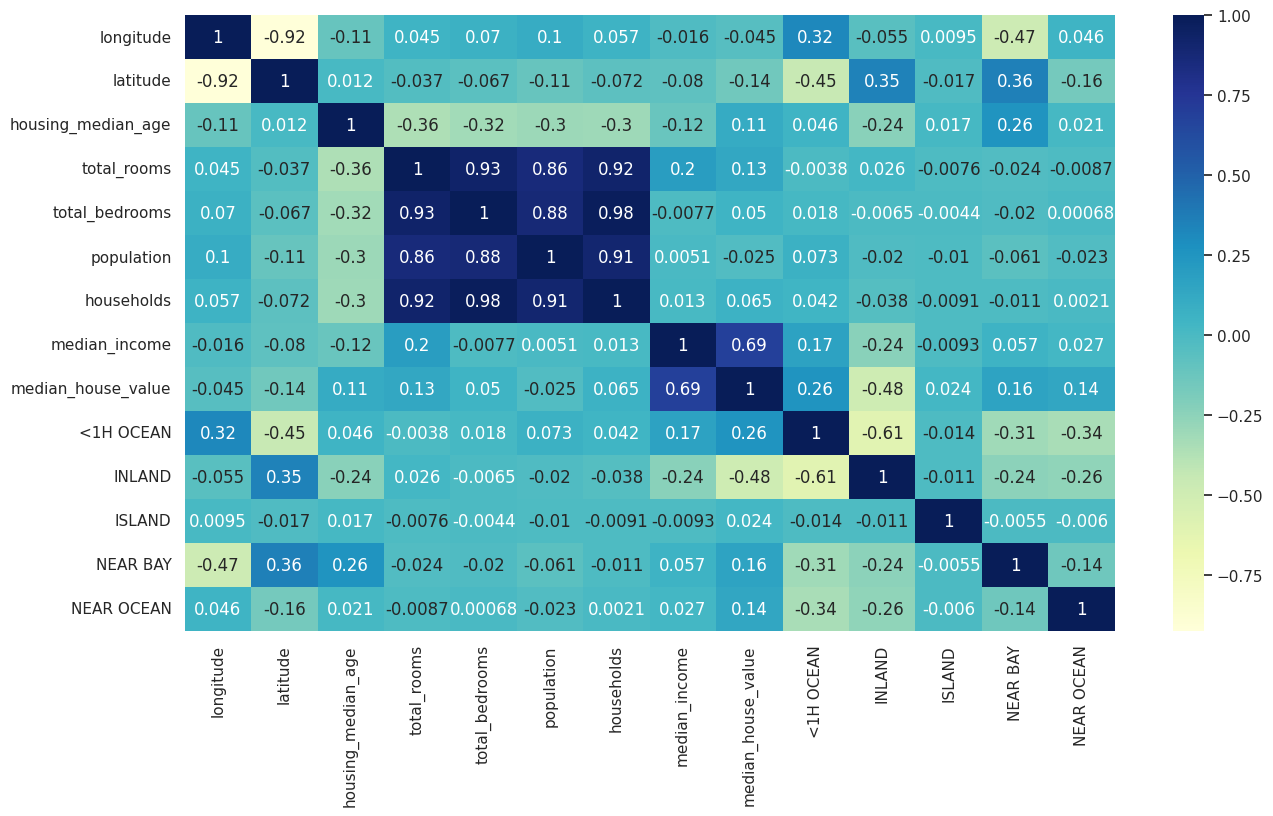

In [33]:
sb.set(rc={'figure.figsize':(15,8)})
sb.heatmap(datos_na.corr(), annot=True, cmap="YlGnBu")

In [34]:
datos_na.corr()["median_house_value"].sort_values(ascending=False)

,median_house_value
median_house_value,1.000000
median_income,0.688355
<1H OCEAN,0.257614
NEAR BAY,0.160526
NEAR OCEAN,0.140378
total_rooms,0.133294
housing_median_age,0.106432
households,0.064894
total_bedrooms,0.049686
ISLAND,0.023525


<Axes: xlabel='median_house_value', ylabel='median_income'>

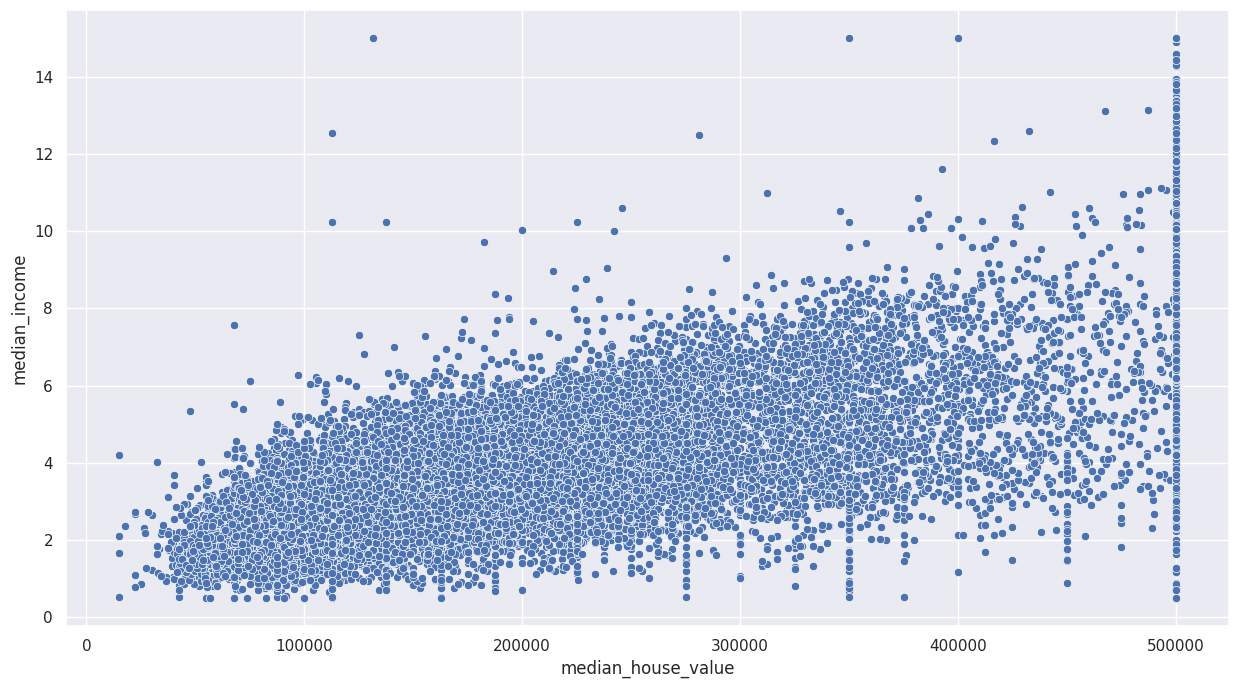

In [38]:
sb.scatterplot(data=datos, x="median_house_value", y="median_income")

In [39]:
datos_na["bedroom_ratio"] = datos_na["total_bedrooms"] / datos_na["total_rooms"]

<Axes: >

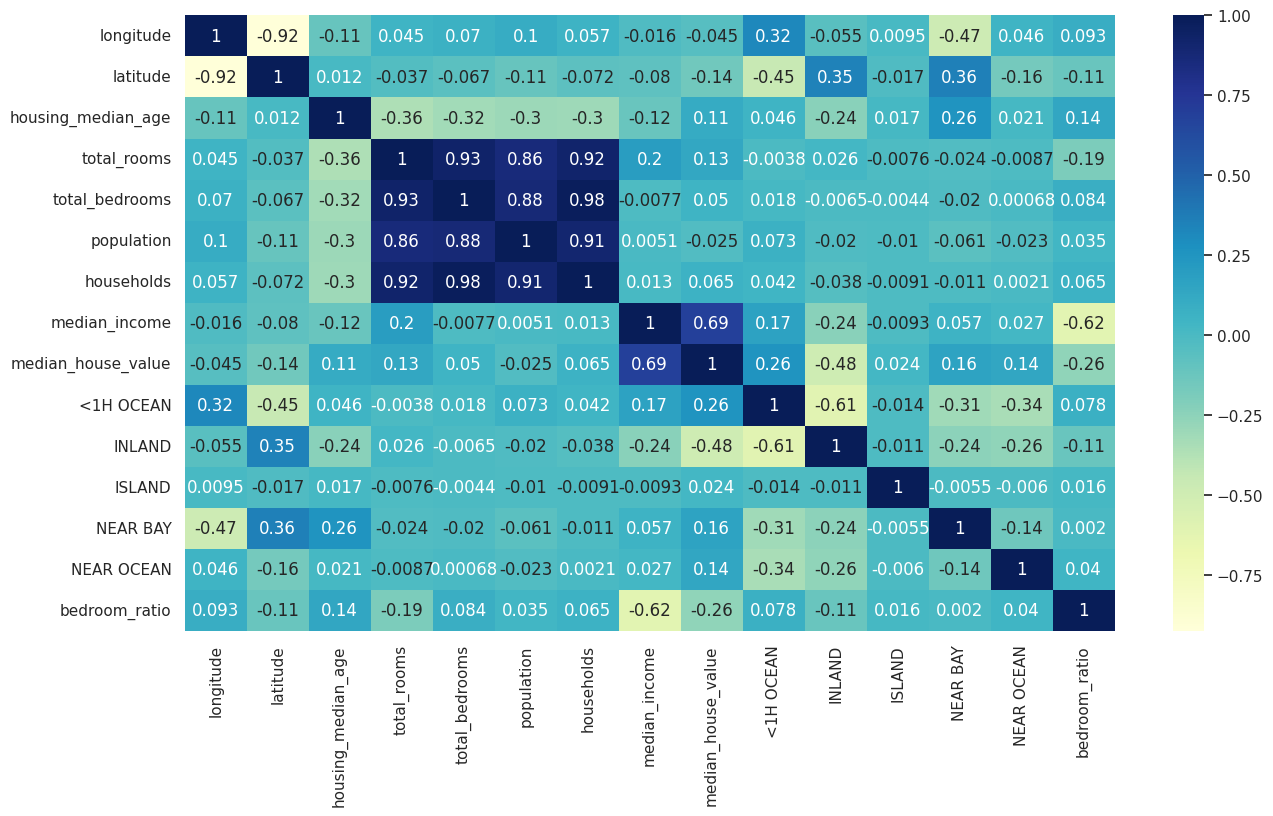

In [40]:
sb.set(rc={'figure.figsize':(15,8)})
sb.heatmap(datos_na.corr(), annot=True, cmap="YlGnBu")

In [41]:
# Separar las caracteristicas de la etiqueta
x = datos_na.drop("median_house_value", axis=1)
y = datos_na["median_house_value"]

In [42]:
# Separar los datos en dos partes: Conjunto de Entrenamiento y uno de pruebas
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [43]:
x_train.shape

(16346, 14)

In [44]:
y_train.shape

(16346,)

In [45]:
x_test.shape

(4087, 14)

In [46]:
y_test.shape

(4087,)

In [47]:
from sklearn.linear_model import LinearRegression

modelo = LinearRegression()

In [48]:
modelo.fit(x_train, y_train)

LinearRegression()

In [49]:
predicciones = modelo.predict(x_test)

In [50]:
predicciones

array([223464.16966871, 253863.24981057, 310969.56563671, ...,
        82554.81165964, 130476.5297163 , 438615.33585298])

In [52]:
comparativa = {"Predicciones": predicciones,"Valor Real": y_test}
pd.DataFrame(comparativa)

,Predicciones,Valor Real
220,223464.169669,156500.0
17938,253863.249811,229300.0
20404,310969.565637,258000.0
18855,35226.469558,57500.0
10420,321034.945073,402900.0
...,...,...
20044,87309.463166,51900.0
5630,322899.847638,290500.0
9218,82554.811660,52300.0
19967,130476.529716,74300.0


In [54]:
#Overfitting sobreajuste
print(modelo.score(x_train, y_train))
print(modelo.score(x_test, y_test))

0.6514619695169362
0.6539628277587411


In [56]:
# error
from sklearn.metrics import mean_squared_error
import numpy as np

rmse = np.sqrt(mean_squared_error(y_test, predicciones))
rmse

np.float64(67518.6797296885)

In [57]:
datos_na.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN,bedroom_ratio
count,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000
mean,-119.570689,35.633221,28.633094,2636.504233,537.870553,1424.946949,499.433465,3.871162,206864.413155,0.442128,0.317917,0.000245,0.111095,0.128615,0.213039
std,2.003578,2.136348,12.591805,2185.269567,421.385070,1133.208490,382.299226,1.899291,115435.667099,0.496652,0.465678,0.015641,0.314257,0.334782,0.057983
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.100000
25%,-121.800000,33.930000,18.000000,1450.000000,296.000000,787.000000,280.000000,2.563700,119500.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.175427
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.536500,179700.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.203162
75%,-118.010000,37.720000,37.000000,3143.000000,647.000000,1722.000000,604.000000,4.744000,264700.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.239821
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [59]:
# scaler escalamiento
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.fit_transform(x_test)

In [60]:
x_train

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN,bedroom_ratio
11275,-117.97,33.78,35.0,3148.0,597.0,2110.0,587.0,3.9479,1,0,0,0,0,0.189644
2575,-124.13,40.80,31.0,2152.0,462.0,1259.0,420.0,2.2478,0,0,0,0,1,0.214684
6684,-118.07,34.16,39.0,1804.0,265.0,730.0,276.0,6.4761,0,1,0,0,0,0.146896
10141,-117.89,33.90,16.0,1426.0,216.0,652.0,226.0,6.5284,1,0,0,0,0,0.151473
3995,-118.58,34.17,29.0,3393.0,574.0,1471.0,587.0,6.2064,1,0,0,0,0,0.169172
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14116,-117.10,32.73,24.0,2927.0,704.0,2005.0,668.0,2.2375,0,0,0,0,1,0.240519
1541,-122.04,37.85,27.0,6039.0,780.0,2181.0,761.0,9.5862,0,0,0,1,0,0.129160
9872,-121.83,36.61,26.0,3723.0,789.0,2563.0,747.0,3.4531,1,0,0,0,0,0.211926
14510,-117.15,32.91,15.0,1613.0,303.0,702.0,240.0,4.8750,1,0,0,0,0,0.187849


In [63]:
pd.DataFrame(x_train_scaled)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,0.801403,-0.869915,0.507910,0.238513,0.143407,0.604692,0.232347,0.041759,1.127626,-0.684286,-0.013549,-0.354842,-0.384569,-0.401710
1,-2.273623,2.415246,0.189854,-0.220333,-0.178551,-0.142829,-0.206022,-0.853096,-0.886819,-0.684286,-0.013549,-0.354842,2.600314,0.026018
2,0.751484,-0.692086,0.825967,-0.380653,-0.648370,-0.607504,-0.584017,1.372487,-0.886819,1.461377,-0.013549,-0.354842,-0.384569,-1.131936
3,0.841339,-0.813759,-1.002857,-0.554794,-0.765229,-0.676020,-0.715265,1.400015,1.127626,-0.684286,-0.013549,-0.354842,-0.384569,-1.053754
4,0.496896,-0.687406,0.030826,0.351382,0.088555,0.043392,0.232347,1.230529,1.127626,-0.684286,-0.013549,-0.354842,-0.384569,-0.751418
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16341,1.235701,-1.361286,-0.366744,0.136701,0.398588,0.512459,0.444969,-0.858517,-0.886819,-0.684286,-0.013549,-0.354842,2.600314,0.467335
16342,-1.230311,1.034730,-0.128202,1.570365,0.579838,0.667058,0.689090,3.009501,-0.886819,-0.684286,-0.013549,2.818158,-0.384569,-1.434889
16343,-1.125480,0.454445,-0.207716,0.503409,0.601302,1.002608,0.652341,-0.218681,1.127626,-0.684286,-0.013549,-0.354842,-0.384569,-0.021096
16344,1.210741,-1.277051,-1.082371,-0.468645,-0.557745,-0.632099,-0.678516,0.529742,1.127626,-0.684286,-0.013549,-0.354842,-0.384569,-0.432380
